In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

data = pd.read_csv(r"C:\Users\abdul\Downloads\archive (4)\student-por.csv")

In [7]:
print(data.isnull().sum())

data.fillna(0, inplace=True)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})

In [9]:
selected_features = ['studytime', 'failures', 'absences', 'famsup', 'internet', 'health', 'freetime', 'Medu', 'Fedu']
X = data[selected_features]
y = data['G3']

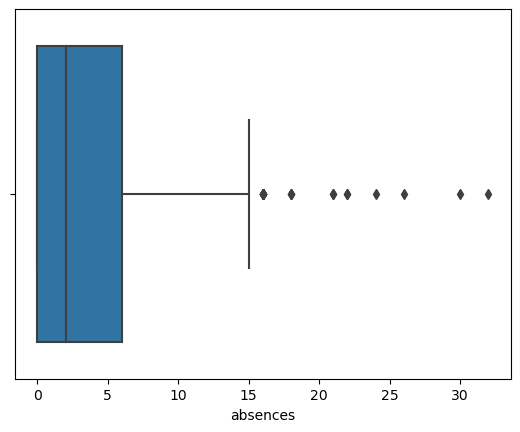

In [10]:
import seaborn as sns
sns.boxplot(x=data['absences'])

data = data[data['absences'] < 50]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
data['avg_previous_grades'] = data[['G1', 'G2']].mean(axis=1)

In [13]:
from scipy.stats import zscore
import pandas as pd

z_scores = zscore(data['absences'])
absences_no_outliers = data[abs(np.array(z_scores)) < 3]

print(f"Removed {len(data) - len(absences_no_outliers)} outliers.")

Removed 11 outliers.


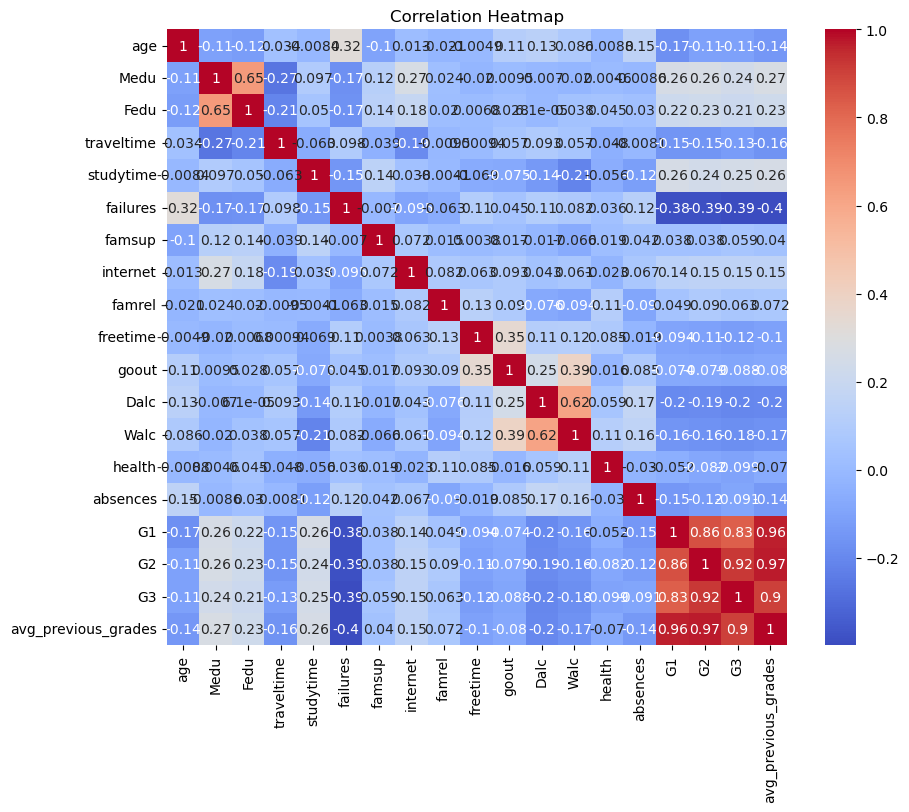

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = data.drop(columns=['G3'])  # All columns except 'G3' (final grade)
y = data['G3']  # Final grade (target)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Encode categorical variables
    ],
    remainder='passthrough'  # Keep numeric columns as is
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess the data
    ('regressor', LinearRegression())  # Train Linear Regression model
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 2.2884800974687263
R-squared (R²): 0.765325394728153


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer

# Random Forest Model
random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the same preprocessor for categorical encoding
    ('random_forest', RandomForestRegressor(random_state=42, n_estimators=100))
])

random_forest.fit(X_train, y_train)
y_rf_pred = random_forest.predict(X_test)

# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("Random Forest Mean Squared Error (MSE):", rf_mse)
print("Random Forest R-squared (R²):", rf_r2)

# Decision Tree Model
decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the same preprocessor for categorical encoding
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

decision_tree.fit(X_train, y_train)
y_dt_pred = decision_tree.predict(X_test)

# Decision Tree Evaluation
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)

print("Decision Tree Mean Squared Error (MSE):", dt_mse)
print("Decision Tree R-squared (R²):", dt_r2)

# Convert Regression Output to Classification
# Discretize target variable into bins (e.g., A: High grades, B: Mid, C: Low)
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_train_class = discretizer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_class = discretizer.transform(y_test.values.reshape(-1, 1)).flatten()

# Update models for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest_class = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess
    ('random_forest_class', RandomForestClassifier(random_state=42, n_estimators=100))
])

random_forest_class.fit(X_train, y_train_class)
y_rf_class_pred = random_forest_class.predict(X_test)

# Evaluate Classification Model
print("Random Forest Classification Report:")
print(classification_report(y_test_class, y_rf_class_pred))

# Decision Tree Classification
decision_tree_class = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree_class', DecisionTreeClassifier(random_state=42))
])

decision_tree_class.fit(X_train, y_train_class)
y_dt_class_pred = decision_tree_class.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test_class, y_dt_class_pred))

# Confusion Matrix (Random Forest)
rf_conf_matrix = confusion_matrix(y_test_class, y_rf_class_pred)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

# Confusion Matrix (Decision Tree)
dt_conf_matrix = confusion_matrix(y_test_class, y_dt_class_pred)
print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)

Random Forest Mean Squared Error (MSE): 1.736956153846154
Random Forest R-squared (R²): 0.8218819992233198
Decision Tree Mean Squared Error (MSE): 1.8384615384615384
Decision Tree R-squared (R²): 0.8114730224994539
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.94      0.89      0.91        71
         2.0       0.87      0.95      0.91        57

    accuracy                           0.91       130
   macro avg       0.94      0.78      0.83       130
weighted avg       0.91      0.91      0.91       130

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.20      0.50      0.29         2
         1.0       0.87      0.77      0.82        71
         2.0       0.81      0.88      0.84        57

    accuracy                           0.82       130
   macro avg       0.63      0.72      0.65       130
weig

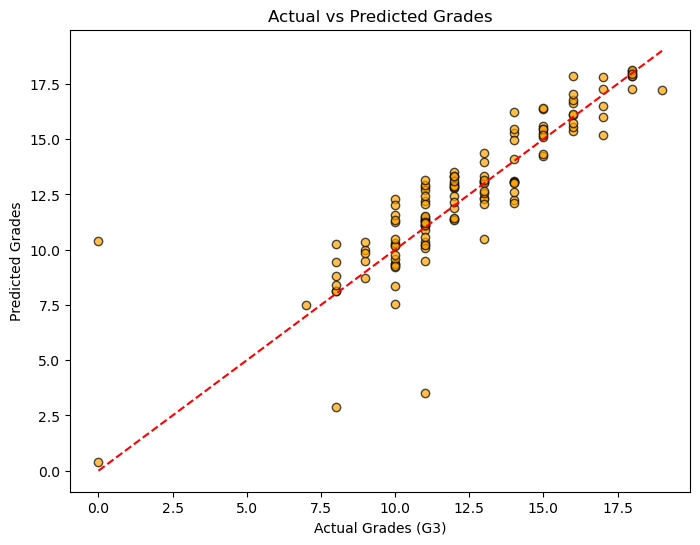

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split the data
X = data[['absences', 'studytime', 'failures', 'Medu', 'Fedu', 'avg_previous_grades']]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Grades')
plt.xlabel('Actual Grades (G3)')
plt.ylabel('Predicted Grades')
plt.show()

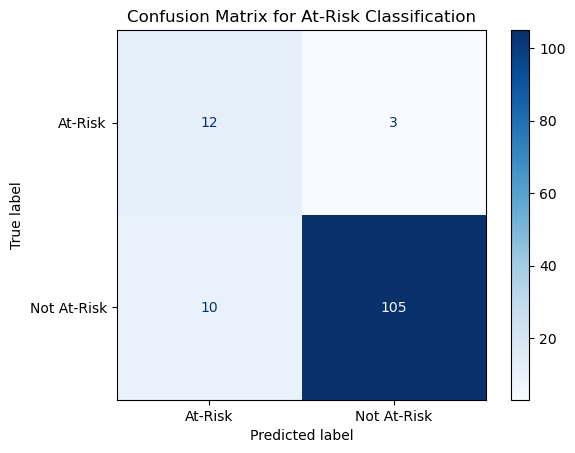

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Binarize the target variable into "at-risk" and "not at-risk" (example threshold: G3 < 10)
y_test_class = np.where(y_test < 10, 'At-Risk', 'Not At-Risk')
y_pred_class = np.where(y_pred < 10, 'At-Risk', 'Not At-Risk')

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=['At-Risk', 'Not At-Risk'])

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['At-Risk', 'Not At-Risk'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for At-Risk Classification')
plt.show()